# Classification on DS1

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [59]:
# Load the dataset
file1_path = "/content/ds1.csv"
df1 = pd.read_csv(file1_path)

# Drop potential leakage columns
df1_cleaned = df1.drop(columns=['FIRE_NAME'], errors='ignore')

# Create binary target variable: Fire (1) if GIS_ACRES > 0, No Fire (0) otherwise
df1_cleaned['fire'] = (df1_cleaned['GIS_ACRES'] > 0).astype(int)

# Select relevant features
selected_features = ['maxtempF', 'mintempF', 'avgtempF', 'humid', 'wind', 'precip', 'sunHour']

# Define features (X) and target variable (y)
X = df1_cleaned[selected_features]
y = df1_cleaned['fire']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame format
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)


Random Forest Model Accuracy: 0.8650

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       832
           1       0.84      0.78      0.81       487

    accuracy                           0.87      1319
   macro avg       0.86      0.85      0.85      1319
weighted avg       0.86      0.87      0.86      1319



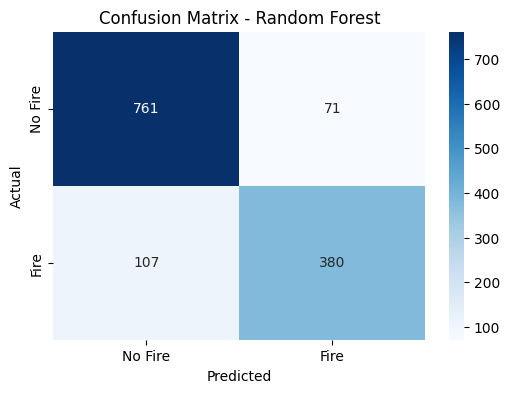

In [61]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_df)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display results
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_rep_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Logistic Regression Model Accuracy: 0.7604

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       832
           1       0.68      0.66      0.67       487

    accuracy                           0.76      1319
   macro avg       0.74      0.74      0.74      1319
weighted avg       0.76      0.76      0.76      1319



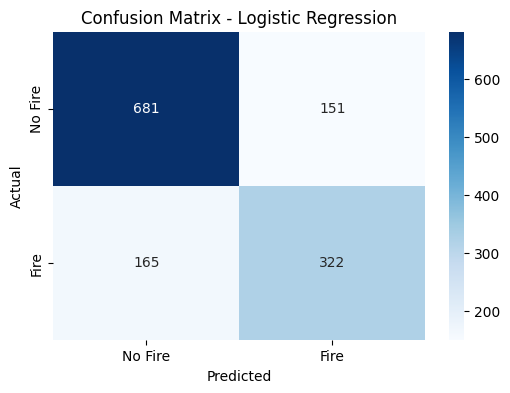

In [62]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_df, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test_df)

# Evaluate model performance
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Display results
print(f"Logistic Regression Model Accuracy: {accuracy_log:.4f}")
print("\nClassification Report:\n", classification_rep_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Gradient Boosting Model Accuracy: 0.8127

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       832
           1       0.74      0.75      0.75       487

    accuracy                           0.81      1319
   macro avg       0.80      0.80      0.80      1319
weighted avg       0.81      0.81      0.81      1319



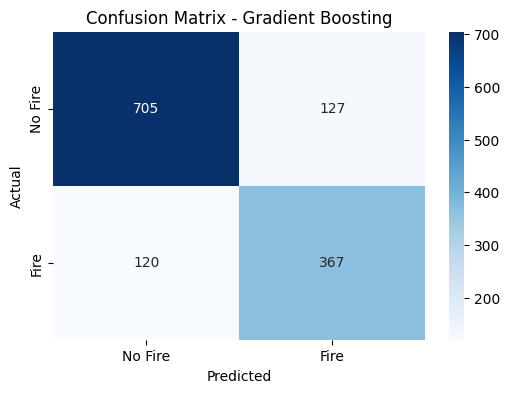

In [63]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_df)

# Evaluate model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display results
print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.4f}")
print("\nClassification Report:\n", classification_rep_gb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


SVM Model Accuracy: 0.7688

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       832
           1       0.68      0.69      0.69       487

    accuracy                           0.77      1319
   macro avg       0.75      0.75      0.75      1319
weighted avg       0.77      0.77      0.77      1319



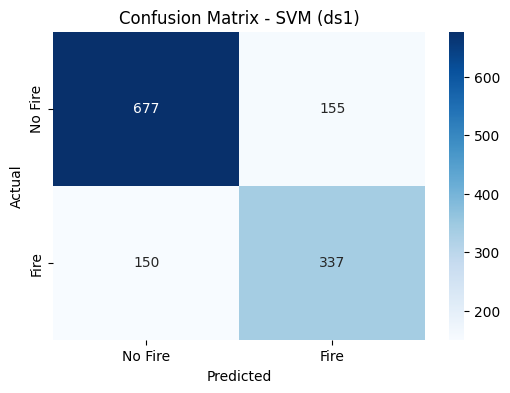

In [64]:
# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_df)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display results
print(f"SVM Model Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (ds1)")
plt.show()


KNN Model Accuracy: 0.8059

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       832
           1       0.74      0.74      0.74       487

    accuracy                           0.81      1319
   macro avg       0.79      0.79      0.79      1319
weighted avg       0.81      0.81      0.81      1319



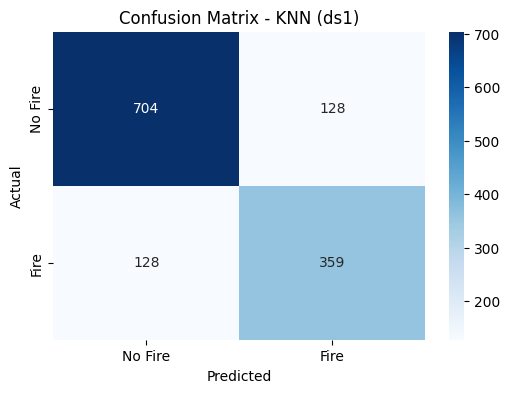

In [65]:
# Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test_df)

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display results
print(f"KNN Model Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report:\n", classification_rep_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (ds1)")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:09:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.8423

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       832
           1       0.80      0.77      0.78       487

    accuracy                           0.84      1319
   macro avg       0.83      0.83      0.83      1319
weighted avg       0.84      0.84      0.84      1319



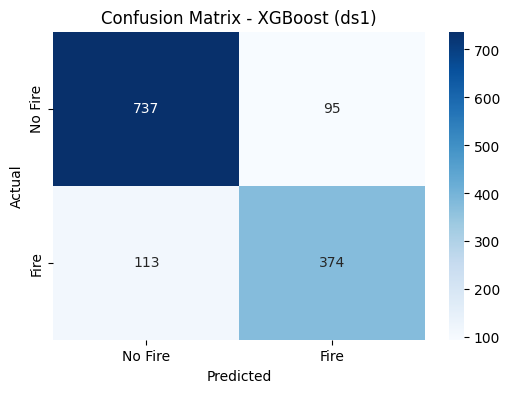

In [66]:
# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_df)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display results
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (ds1)")
plt.show()


<ipython-input-67-54152ca3962b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models_accuracy_ds1.keys()), y=list(models_accuracy_ds1.values()), palette="viridis")


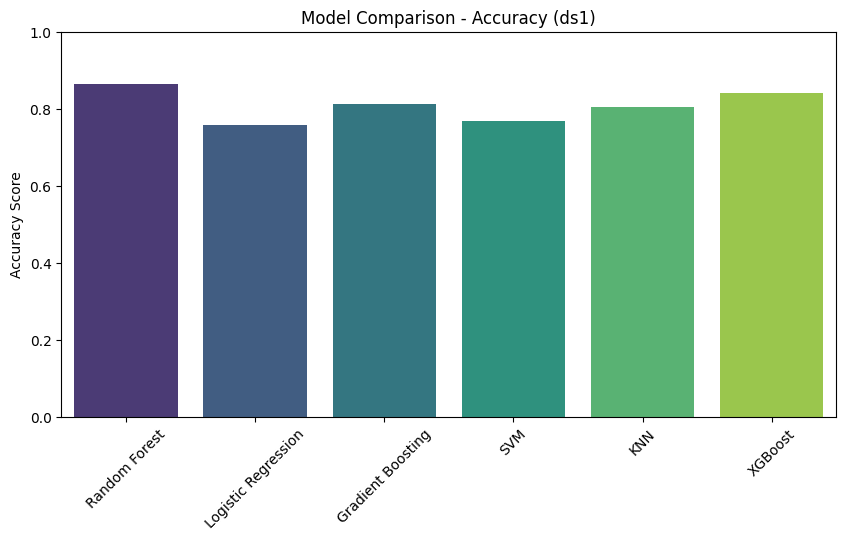


Best performing model on ds1: Random Forest with accuracy of 0.8650


In [67]:
# Store model accuracy
models_accuracy_ds1 = {
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_log,
    "Gradient Boosting": accuracy_gb,
    "SVM": accuracy_svm,
    "KNN": accuracy_knn,
    "XGBoost": accuracy_xgb
}

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(models_accuracy_ds1.keys()), y=list(models_accuracy_ds1.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.title("Model Comparison - Accuracy (ds1)")
plt.xticks(rotation=45)
plt.show()

# Print best model
best_model_ds1 = max(models_accuracy_ds1, key=models_accuracy_ds1.get)
print(f"\nBest performing model on ds1: {best_model_ds1} with accuracy of {models_accuracy_ds1[best_model_ds1]:.4f}")


# Classification on DS1 + DS2

In [68]:
import pandas as pd

# Load both datasets
df1 = pd.read_csv("/content/ds1.csv")
df2 = pd.read_csv("/content/ds2.csv")

# Combine datasets row-wise
df_combined = pd.concat([df1, df2], ignore_index=True)

# Display the first few rows to verify
df_combined.head()
print(df_combined.columns)

Index(['maxtempF', 'mintempF', 'avgtempF', 'totalSnow', 'humid', 'wind',
       'precip', 'q_avgtempF', 'q_avghumid', 'q_sumprecip', 'sunHour',
       'GIS_ACRES', 'FRI', 'CEI'],
      dtype='object')


In [69]:
# Check the number of rows in the combined DataFrame
num_rows = df_combined.shape[0]
print(f"Total number of rows: {num_rows}")

Total number of rows: 10988


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [71]:
# Drop potential leakage columns
df_combined_cleaned = df_combined.drop(columns=['FIRE_NAME'], errors='ignore')

# Create binary target variable: Fire (1) if GIS_ACRES > 0, No Fire (0) otherwise
df_combined_cleaned['fire'] = (df_combined_cleaned['GIS_ACRES'] > 0).astype(int)

# Select relevant features
selected_features = ['maxtempF', 'mintempF', 'avgtempF', 'humid', 'wind', 'precip', 'sunHour']

# Define features (X) and target variable (y)
X = df_combined_cleaned[selected_features]
y = df_combined_cleaned['fire']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame format
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)


Random Forest Model Accuracy: 0.9013

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1405
           1       0.87      0.86      0.86       793

    accuracy                           0.90      2198
   macro avg       0.89      0.89      0.89      2198
weighted avg       0.90      0.90      0.90      2198



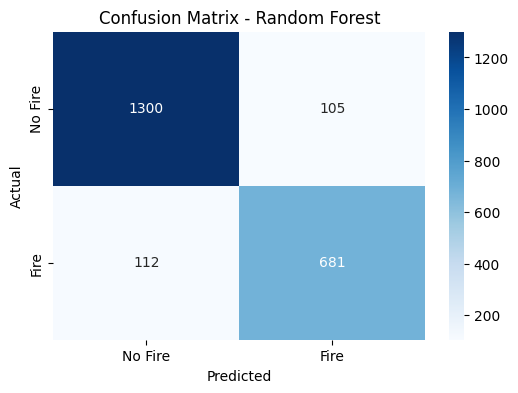

In [72]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_df)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Logistic Regression Model Accuracy: 0.7534

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1405
           1       0.66      0.65      0.66       793

    accuracy                           0.75      2198
   macro avg       0.73      0.73      0.73      2198
weighted avg       0.75      0.75      0.75      2198



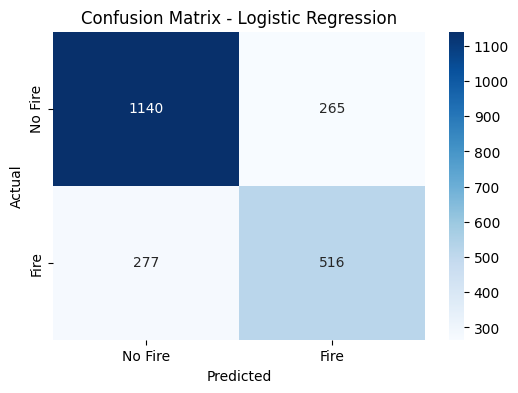

In [73]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_df, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test_df)

# Evaluate model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Model Accuracy: {accuracy_log:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Gradient Boosting Model Accuracy: 0.8007

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1405
           1       0.72      0.74      0.73       793

    accuracy                           0.80      2198
   macro avg       0.78      0.79      0.79      2198
weighted avg       0.80      0.80      0.80      2198



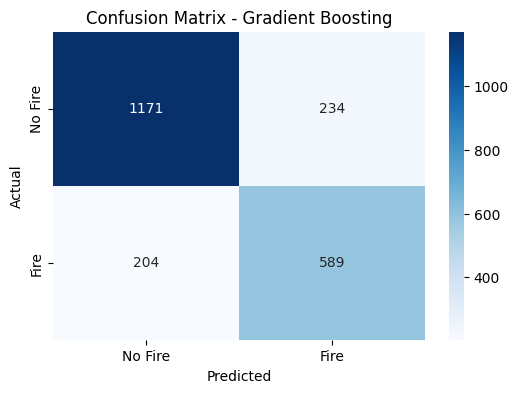

In [74]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_df)

# Evaluate model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


<ipython-input-75-d9347e652083>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette="viridis")


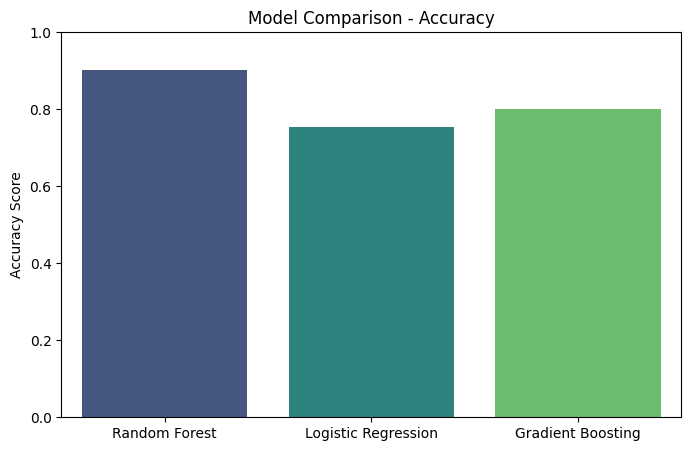


Best performing model: Random Forest with accuracy of 0.9013


In [75]:
# Store model accuracy
models_accuracy = {
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_log,
    "Gradient Boosting": accuracy_gb
}

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.title("Model Comparison - Accuracy")
plt.show()

# Print best model
best_model = max(models_accuracy, key=models_accuracy.get)
print(f"\nBest performing model: {best_model} with accuracy of {models_accuracy[best_model]:.4f}")


In [76]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


SVM Model Accuracy: 0.7812

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1405
           1       0.69      0.73      0.71       793

    accuracy                           0.78      2198
   macro avg       0.76      0.77      0.77      2198
weighted avg       0.78      0.78      0.78      2198



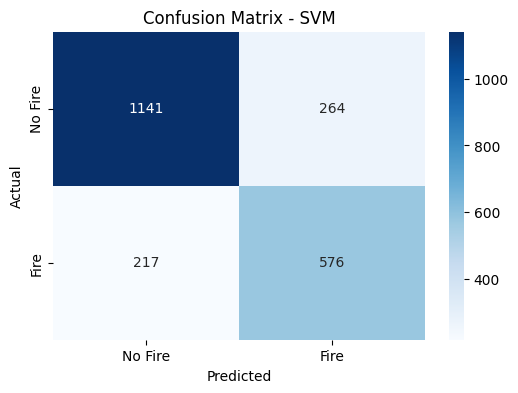

In [77]:
# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_df)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


KNN Model Accuracy: 0.8267

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1405
           1       0.75      0.79      0.77       793

    accuracy                           0.83      2198
   macro avg       0.81      0.82      0.81      2198
weighted avg       0.83      0.83      0.83      2198



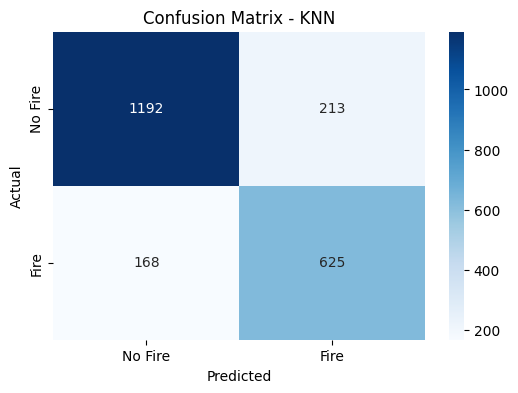

In [78]:
# Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test_df)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:10:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.8735

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1405
           1       0.81      0.84      0.83       793

    accuracy                           0.87      2198
   macro avg       0.86      0.87      0.86      2198
weighted avg       0.87      0.87      0.87      2198



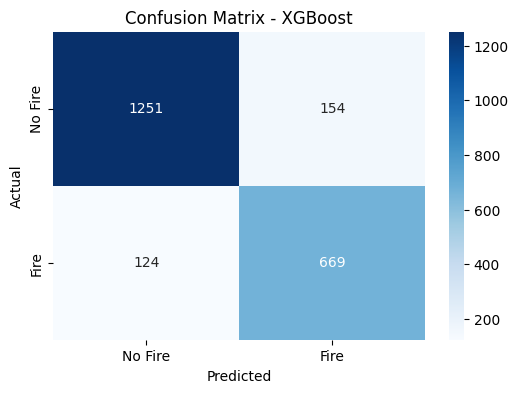

In [79]:
# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_df)

# Evaluate model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


<ipython-input-80-4b8576fb7379>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette="viridis")


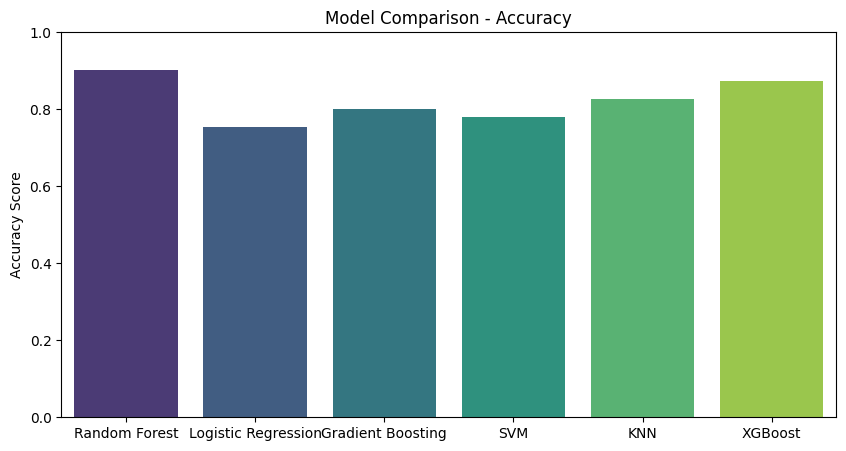


Best performing model: Random Forest with accuracy of 0.9013


In [80]:
# Store model accuracy
models_accuracy.update({
    "SVM": accuracy_svm,
    "KNN": accuracy_knn,
    "XGBoost": accuracy_xgb
})

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.title("Model Comparison - Accuracy")
plt.show()

# Print best model
best_model = max(models_accuracy, key=models_accuracy.get)
print(f"\nBest performing model: {best_model} with accuracy of {models_accuracy[best_model]:.4f}")


# Classification on DS1 + DS2 + DS3

In [81]:
import pandas as pd

# Load all three datasets
df1 = pd.read_csv("/content/ds1.csv")
df2 = pd.read_csv("/content/ds2.csv")
df3 = pd.read_csv("/content/ds3.csv")



In [82]:
# Combine all datasets row-wise
df_final_combined = pd.concat([df1, df2, df3], ignore_index=True)

In [83]:
# Drop potential leakage columns
df_final_cleaned = df_final_combined.drop(columns=['FIRE_NAME'], errors='ignore')

# Create binary target variable: Fire (1) if GIS_ACRES > 0, No Fire (0) otherwise
df_final_cleaned['fire'] = (df_final_cleaned['GIS_ACRES'] > 0).astype(int)

# Select relevant features
selected_features = ['maxtempF', 'mintempF', 'avgtempF', 'humid', 'wind', 'precip', 'sunHour']

# Define features (X) and target variable (y)
X = df_final_cleaned[selected_features]
y = df_final_cleaned['fire']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame format
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)


Random Forest Model Accuracy: 0.9009

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1390
           1       0.87      0.86      0.86       810

    accuracy                           0.90      2200
   macro avg       0.89      0.89      0.89      2200
weighted avg       0.90      0.90      0.90      2200



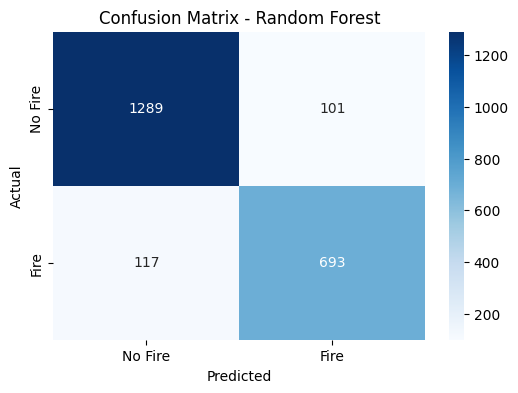

In [91]:

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_df)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display results
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_rep_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Logistic Regression Model Accuracy: 0.7668

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1390
           1       0.69      0.66      0.68       810

    accuracy                           0.77      2200
   macro avg       0.75      0.74      0.75      2200
weighted avg       0.76      0.77      0.77      2200



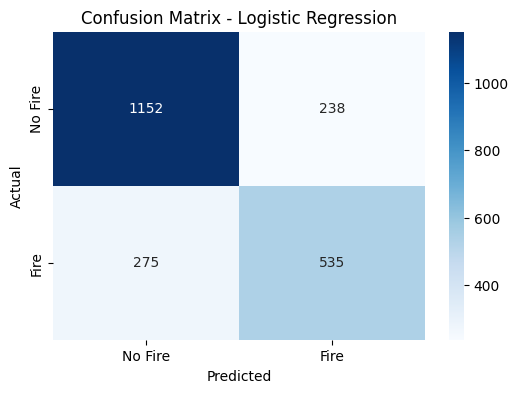

In [94]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_df, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test_df)

# Evaluate model performance
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_rep_log = classification_report(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Display results
print(f"Logistic Regression Model Accuracy: {accuracy_log:.4f}")
print("\nClassification Report:\n", classification_rep_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Gradient Boosting Model Accuracy: 0.8118

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1390
           1       0.75      0.74      0.74       810

    accuracy                           0.81      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.81      0.81      0.81      2200



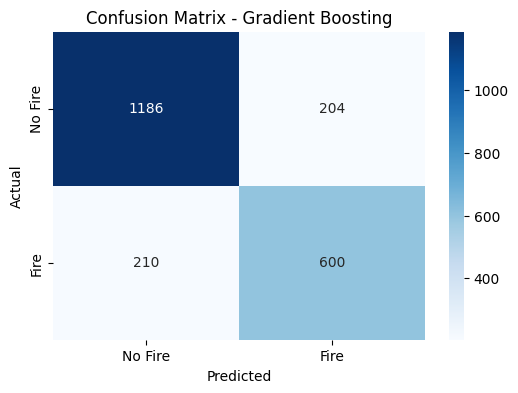

In [95]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_df)

# Evaluate model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display results
print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.4f}")
print("\nClassification Report:\n", classification_rep_gb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


SVM Model Accuracy: 0.7868

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1390
           1       0.71      0.72      0.71       810

    accuracy                           0.79      2200
   macro avg       0.77      0.77      0.77      2200
weighted avg       0.79      0.79      0.79      2200



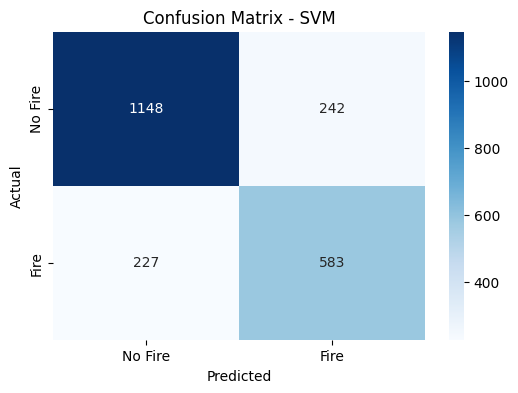

In [96]:
# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_df)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display results
print(f"SVM Model Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


KNN Model Accuracy: 0.8205

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1390
           1       0.75      0.77      0.76       810

    accuracy                           0.82      2200
   macro avg       0.81      0.81      0.81      2200
weighted avg       0.82      0.82      0.82      2200



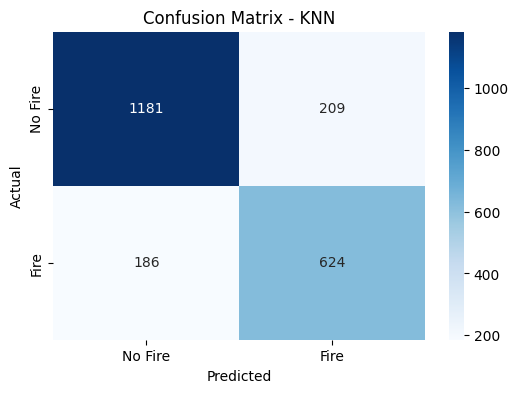

In [97]:
# Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test_df)

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display results
print(f"KNN Model Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report:\n", classification_rep_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.8723

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1390
           1       0.83      0.82      0.83       810

    accuracy                           0.87      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.87      0.87      0.87      2200



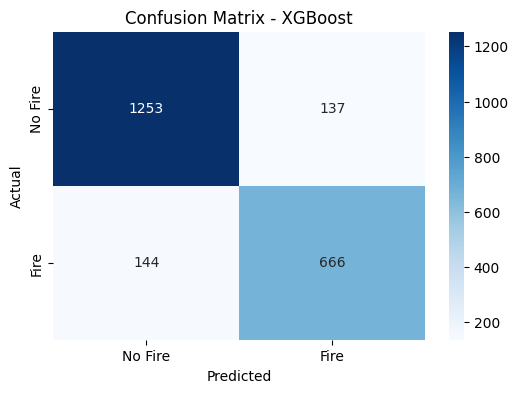

In [98]:
# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_df, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_df)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display results
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


<ipython-input-99-03087d021b58>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette="viridis")


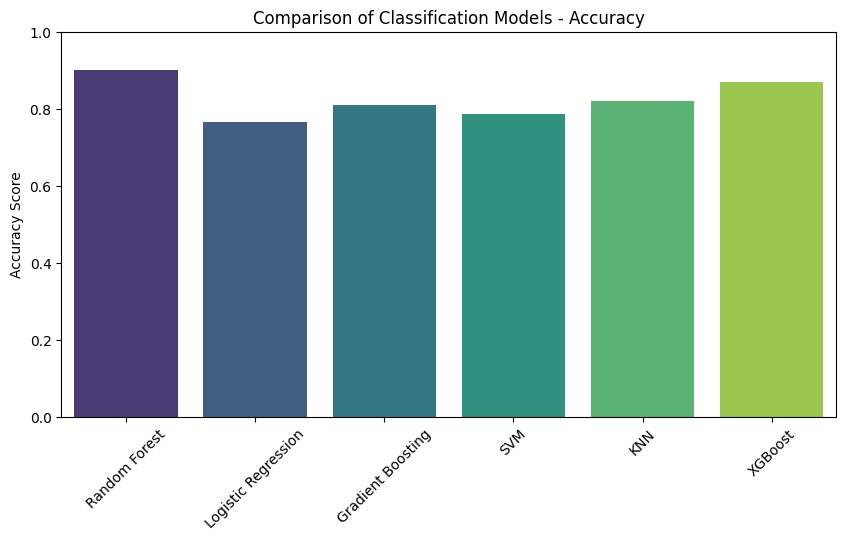


Best performing model: Random Forest with accuracy of 0.9009


In [99]:
models_accuracy = {
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_log,
    "Gradient Boosting": accuracy_gb,
    "SVM": accuracy_svm,
    "KNN": accuracy_knn,
    "XGBoost": accuracy_xgb
}

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.title("Comparison of Classification Models - Accuracy")
plt.xticks(rotation=45)
plt.show()

# Print the best model
best_model = max(models_accuracy, key=models_accuracy.get)
print(f"\nBest performing model: {best_model} with accuracy of {models_accuracy[best_model]:.4f}")


## Muller Loop

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load datasets
df1 = pd.read_csv("/content/ds1.csv")
df2 = pd.read_csv("/content/ds2.csv")
df3 = pd.read_csv("/content/ds3.csv")

# Function to preprocess data
def preprocess_data(df):
    df_cleaned = df.drop(columns=['FIRE_NAME'], errors='ignore')  # Drop leakage columns
    df_cleaned['fire'] = (df_cleaned['GIS_ACRES'] > 0).astype(int)  # Binary target variable

    selected_features = ['maxtempF', 'mintempF', 'avgtempF', 'humid', 'wind', 'precip', 'sunHour']
    X = df_cleaned[selected_features]
    y = df_cleaned['fire']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return pd.DataFrame(X_train_scaled, columns=selected_features), pd.DataFrame(X_test_scaled, columns=selected_features), y_train, y_test

# List of datasets to train on incrementally
datasets = {
    "ds1": df1,
    "ds1+ds2": pd.concat([df1, df2], ignore_index=True),
    "ds1+ds2+ds3": pd.concat([df1, df2, df3], ignore_index=True)
}

# Classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
results = []

# Run the Muller Loop
for dataset_name, dataset in datasets.items():
    X_train_df, X_test_df, y_train, y_test = preprocess_data(dataset)

    for model_name, model in models.items():
        model.fit(X_train_df, y_train)
        y_pred = model.predict(X_test_df)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results.append({
            "Dataset": dataset_name,
            "Model": model_name,
            "Accuracy": round(accuracy, 4)
        })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
display(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:19:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:19:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Dataset,Model,Accuracy
0,ds1,Random Forest,0.8650
1,ds1,Logistic Regression,0.7604
2,ds1,Gradient Boosting,0.8127
3,ds1,SVM,0.7688
4,ds1,KNN,0.8059
5,ds1,XGBoost,0.8423
6,ds1+ds2,Random Forest,0.9013
7,ds1+ds2,Logistic Regression,0.7534
8,ds1+ds2,Gradient Boosting,0.8007
9,ds1+ds2,SVM,0.7812


<Figure size 1200x600 with 0 Axes>

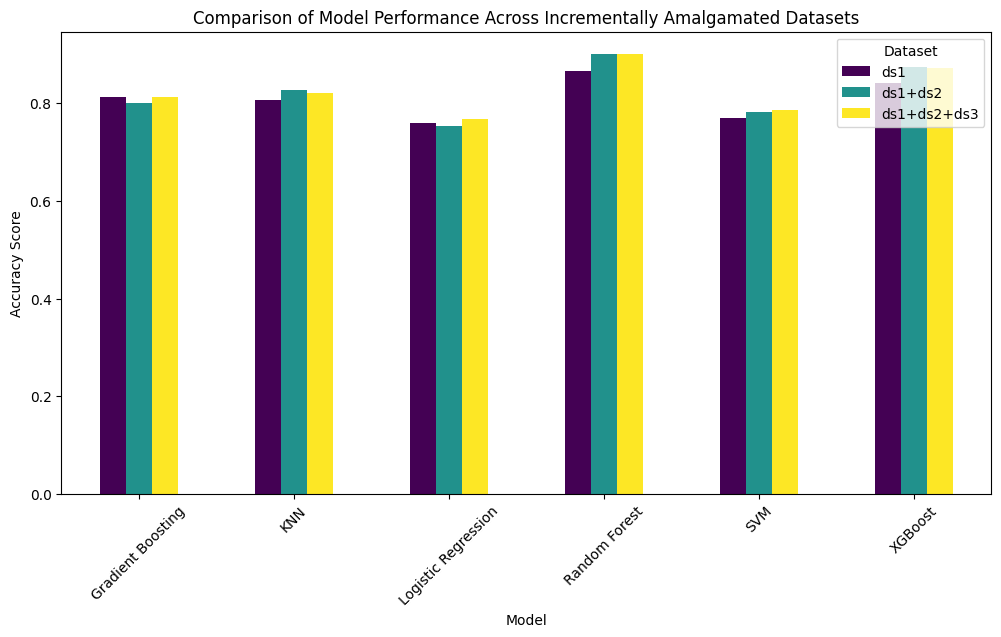

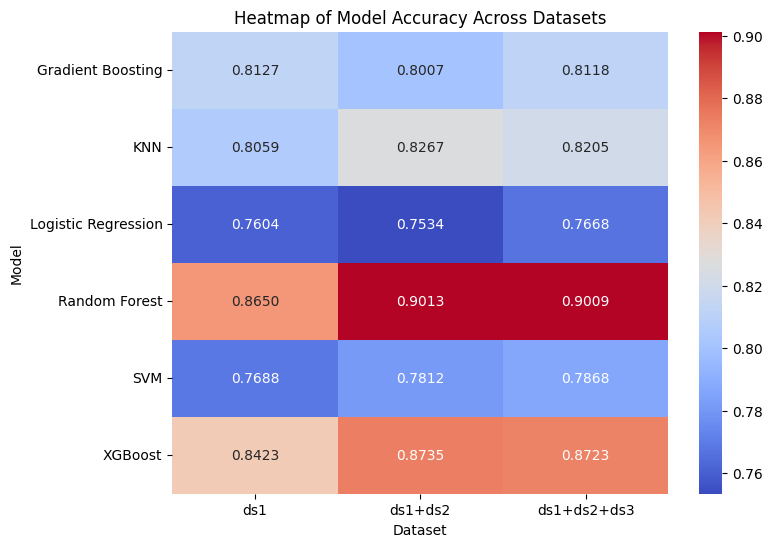

In [102]:
# Pivot for visualization
results_pivot = results_df.pivot(index="Model", columns="Dataset", values="Accuracy")

# Plot a bar chart
plt.figure(figsize=(12, 6))
results_pivot.plot(kind='bar', figsize=(12, 6), colormap="viridis")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Performance Across Incrementally Amalgamated Datasets")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.show()

# Plot heatmap for visual comparison
plt.figure(figsize=(8, 6))
sns.heatmap(results_pivot, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Heatmap of Model Accuracy Across Datasets")
plt.xlabel("Dataset")
plt.ylabel("Model")
plt.show()